EXO1

In [1]:
import pandas as pd
import io

wine = pd.read_csv('winequality-white.csv', sep=';')

from sklearn.utils import shuffle
wine = wine[0:1000]
wine = shuffle(wine)

EXO2

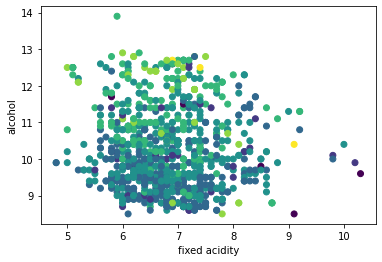

In [2]:
import matplotlib.pyplot as plt

plt.scatter(wine['fixed acidity'],wine['alcohol'],c= wine['quality'],cmap='viridis')
plt.xlabel("fixed acidity") 
plt.ylabel("alcohol")
plt.show()
#Scatter plot of our dataset

LEARNING RATE DYNAMICS EXO3

In [3]:
from keras.utils import to_categorical
X = wine.iloc[:,0:11]
y = wine.iloc[:,11]
X = X.values
y= y.values

y = to_categorical(y)

EXO 4

In [4]:
n_train = int(0.8*(len(wine)))
trainX , testX = X[:n_train , :], X[n_train:, :] 
trainy, testy = y[:n_train], y[n_train:]

trainX.shape, testX.shape, trainy.shape, testy.shape

((800, 11), (200, 11), (800, 10), (200, 10))

EXO 5

In [5]:
import tensorflow as tf

mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = 'relu', input_dim=11),
    tf.keras.layers.Dense(10, activation = 'softmax')])

EXO 6

In [6]:
from tensorflow import keras
from keras.optimizers import SGD
# compile model
lrate = 0.1
mlp.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate= lrate), metrics=['accuracy'])

EXO 7

In [7]:
# fit model
history = mlp.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=1)

Epoch 1/200
25/25 [==============================] - 1s 20ms/step - loss: 156.7699 - accuracy: 0.2843 - val_loss: 1.9155 - val_accuracy: 0.4450
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 1.8382 - accuracy: 0.4102 - val_loss: 1.6996 - val_accuracy: 0.4400
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 1.6559 - accuracy: 0.4075 - val_loss: 1.5899 - val_accuracy: 0.4400
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 1.5555 - accuracy: 0.4311 - val_loss: 1.5302 - val_accuracy: 0.4400
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 1.5004 - accuracy: 0.3991 - val_loss: 1.4918 - val_accuracy: 0.4400
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 1.5359 - accuracy: 0.4012 - val_loss: 1.4645 - val_accuracy: 0.4400
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 1.4313 - accuracy: 0.4085 - val_loss: 1.4475 - val_accuracy: 0.4400
Epoch 8/20

EXO 8

Text(0.5, 1.0, 'lrate=0.1')

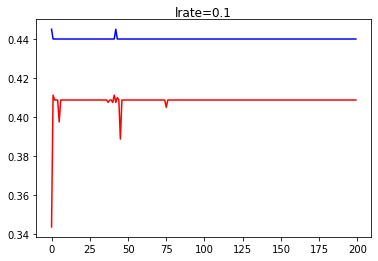

In [8]:
# plot learning curves
plt.plot(history.history['accuracy'], label='train',color = 'r') 
plt.plot(history.history['val_accuracy'], label='test', color = 'b')
plt.title('lrate='+str(lrate), pad=-50)

EXO 9

In [11]:
def fit_model(trainX, trainy, testX, testy, lrate):
  mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = 'relu',  input_dim=11),
    tf.keras.layers.Dense(10, activation = 'softmax')])
  
  mlp.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate= lrate), metrics=['accuracy'])

  history = mlp.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

  plt.plot(history.history['accuracy'], label='train',color = 'r') 
  plt.plot(history.history['val_accuracy'], label='test', color = 'b')
  plt.title('lrate='+str(lrate), pad=-50)

EXO 10

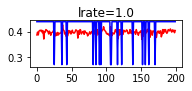

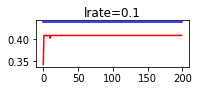

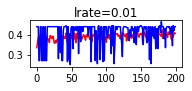

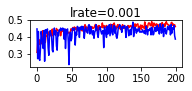

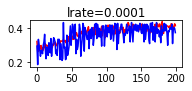

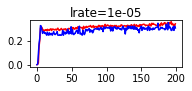

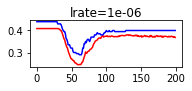

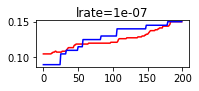

In [12]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

for i in range(len(learning_rates)): # determine the plot number
  plot_no = 420 + (i+1) 
  plt.subplot(plot_no)
  # fit model and plot learning curves for a learning rate
  fit_model(trainX, trainy, testX, testy, learning_rates[i])
  # show learning curves
  plt.show()

The learning rate that is more suitable for our model is the one equal to 0.1.
The less useful is 1E-07

EXO 11

In [13]:
def fit_model(trainX, trainy, testX, testy, momentum):
  mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = 'relu',  input_dim=11),
    tf.keras.layers.Dense(10, activation = 'softmax')])
  lrate = 0.1
  
  mlp.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=lrate, momentum=momentum), metrics=['accuracy'])

  history = mlp.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

  plt.plot(history.history['accuracy'], label='train',color = 'r') 
  plt.plot(history.history['val_accuracy'], label='test', color = 'b')
  plt.title('momentum='+str(momentum), pad=-80)

EXO 12

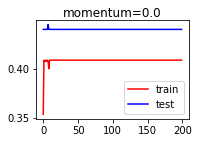

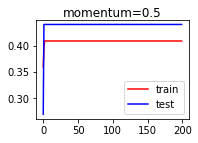

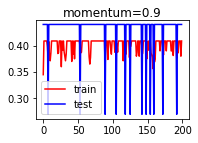

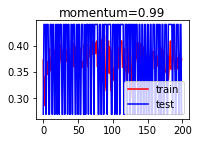

In [14]:
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.9, 0.99]
for i in range(len(momentums)):
  # determine the plot number
  plot_no = 220 + (i+1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a momentum
  fit_model(trainX, trainy, testX, testy, momentums[i])
  # show learning curves
  plt.legend()
  plt.show()

I don't know what to say

EXO 13

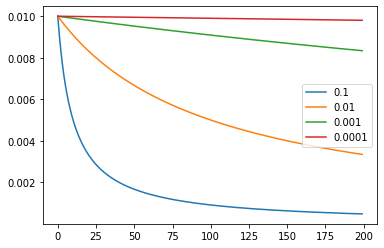

In [15]:
# learning rate decay
def decay_lrate(initial_lrate, decay, iteration):
	return initial_lrate * (1.0 / (1.0 + decay * iteration))
 
decays = [1E-1, 1E-2, 1E-3, 1E-4]
lrate = 0.01
n_updates = 200
for decay in decays:
	# calculate learning rates for updates
	lrates = [decay_lrate(lrate, decay, i) for i in range(n_updates)]
	# plot result
	plt.plot(lrates, label=str(decay))
plt.legend()
plt.show()

EXO 14

In [16]:
def fit_model(trainX, trainy, testX, testy, decay):
  mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = 'relu',  input_dim=11),
    tf.keras.layers.Dense(10, activation = 'softmax')])
  lrate = 0.1
  
  mlp.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=lrate, decay=decay), metrics=['accuracy'])

  history = mlp.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

  plt.plot(history.history['accuracy'], label='train',color = 'r') 
  plt.plot(history.history['val_accuracy'], label='test', color = 'b')
  plt.title('decay='+str(decay), pad=-80)

EXO 15

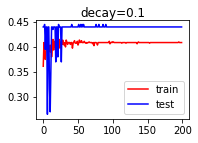

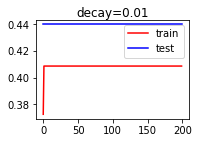

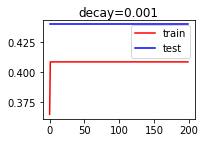

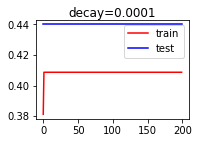

In [ ]:
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]
for i in range(len(decay_rates)):
  # determine the plot number
  plot_no = 220 + (i+1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a decay rate
  fit_model(trainX, trainy, testX, testy,decay_rates[i])
  # show learning curves
  plt.legend()
  plt.show()

EXO 16

In [ ]:
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, optimizer):
  # define model
  model = keras.Sequential([
                            keras.layers.Dense(50, input_dim=11, activation='relu',
                            keras.layers.Dense(10, activation='softmax')
                            ])
  # compile model
  model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
  # fit model
  history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
  # plot learning curves
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.title('optimizer='+str(optimizer), pad=-80)

EXO 17

In [ ]:
methods = ['sgd', 'rmsprop', 'adagrad', 'adam']
for i in range(len(decay_rates)):
  # determine the plot number
  plot_no = 220 + (i+1)
  plt.subplot(plot_no)
  # fit model and plot learning curves for a decay rate
  fit_model(trainX, trainy, testX, testy,methods[i])
  # show learning curves
  plt.legend()
  plt.show()